In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# constants 
path = "E:\\Andreea\\Projects\\Git\\SmartsuitWrapper\\SmartuistWrapper\\tapResultParticipants.csv"
playerNr = 54
idxLength = 28
idxGain = 29

In [9]:
def readFromFile(path):
    results = [0] * 100
    f = open(path, "r")
    player = -1
    for x in f:
        line = x.split(',')
        if len(line) == 31:
            if int(line[0]) == player:
                results[player].append(line)
            else:
                player = int(line[0])
                results[player] = []
                results[player].append(line)
    f.close()
    return results


# a list with the results at idx for the given player    
def getResultPerPlayer(p, results, idx, unique ):
    tmp = results[p]
    values = []
    for words in tmp:
        values.append(float(words[idx]))
    if (unique == True):
        values =  [x for i, x in enumerate(values) if i == values.index(x)]
    return values

# sort list1 - use the indexes of the sorted list1 to rearrage list2    
def getCombinedPlot(list1, list2):
    idx   = np.argsort(list1)
    list1 = np.array(list1)[idx]
    list2 = np.array(list2)[idx]
    
    plt.xticks(np.arange(min(list1), max(list1)+1, 1.0))
    plt.plot(list1[1:], list2[1:], 'o-')
    plt.show()
        
    return (list1, list2)

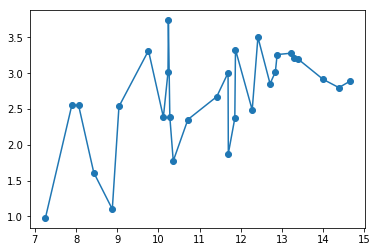

[1.        0.9786524 2.551984  2.551984  1.611498  1.101272  2.535162
 3.314771  2.386767  3.010928  3.73938   2.391127  1.774147  2.352777
 2.671962  3.004519  1.877384  2.370031  3.329168  2.486774  3.502594
 2.853346  3.016062  3.260076  3.278797  3.218337  3.198465  2.915245
 2.79859   2.886631 ]
[-1.        7.256879  7.897451  8.061665  8.430515  8.880099  9.041764
  9.757854 10.11974  10.23163  10.24137  10.27611  10.35925  10.71501
 11.41397  11.68935  11.69588  11.85319  11.86956  12.27556  12.41409
 12.70863  12.83686  12.88076  13.21284  13.28694  13.38621  13.99307
 14.3786   14.64354 ]
Optimal lenght:  2.8668219999999995


In [10]:
results = readFromFile(path)

lengths = getResultPerPlayer(playerNr, results, idxLength, True)
gain = getResultPerPlayer(playerNr, results, idxGain, True)

for i in range(len(lengths)-1, 1, -1):   
        lengths[i] = lengths[i-1]


gain, lengths = getCombinedPlot(gain, lengths)

# get avg length for the top 3 values of gain
print(lengths)
print(gain)
avg = sum(lengths[-3:]) / 3
print("Optimal lenght: ", avg)